# AQM Assignement 2

## Imports

In [3]:
import eikon as ek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import math
import numpy as np
import scipy as sp
from statsmodels import regression
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy
from math import exp, sqrt, log
%matplotlib inline
from scipy import stats
import statsmodels as sm
from statsmodels.regression.linear_model import OLS

## Data Import

In [63]:
gesamt = pd.read_excel('refinitiv.xlsx')
gesamt = gesamt.rename(columns={'CLOSE': 'Cc1'})
gesamt.head()

,Date,Cc1,EUR=,.SP500,.NDX,USF=,.SXEP,USCPI=ECI,USPPM=ECI,USUNR=ECI,EUUNR=ECI,USTBAL=ECI,EUTBSA=ECI,USFBT=ECI,aJPCPICYIY,EUIP=ECI,USIP=ECI
0,2010-01-31,356.50,1.3862,1073.8694,1741.04,0.12,321.75,0.1,120.2,9.8,10.2,-3.774000e+10,-1.600000e+09,6.160000e+10,-1.042753,1.7,1.1
1,2010-02-28,378.00,1.3625,1104.4934,1818.68,0.12,312.85,-0.1,120.2,9.8,10.3,-4.150000e+10,2.000000e+09,4.820000e+10,-0.732218,-0.5,0.3
2,2010-03-31,345.00,1.3510,1169.4312,1958.34,0.01,334.13,0.0,120.2,9.9,10.3,-4.027000e+10,-5.000000e+08,1.076000e+11,-0.834202,1.8,0.7
3,2010-04-30,366.25,1.3295,1186.6894,2000.63,0.20,332.97,0.0,120.4,9.9,10.3,-4.150000e+10,-2.600000e+09,7.720000e+10,-0.937500,0.4,0.4
4,2010-05-31,359.00,1.2305,1089.4058,1852.39,0.18,302.47,-0.1,120.4,9.6,10.3,-4.209000e+10,-4.100000e+09,1.500000e+10,-0.730689,1.9,1.4


## Data Preparation

In [79]:
commodities = gesamt.iloc[:, 0:2]
commodities.head()

,Date,Cc1
0,2010-01-31,356.50
1,2010-02-28,378.00
2,2010-03-31,345.00
3,2010-04-30,366.25
4,2010-05-31,359.00


In [80]:
independent_variables = gesamt_dropped.iloc[:, 1:]
independent_variables.head()

,EUR=,.SP500,.NDX,USF=,.SXEP,USCPI=ECI,USPPM=ECI,USUNR=ECI,EUUNR=ECI,USTBAL=ECI,EUTBSA=ECI,USFBT=ECI,aJPCPICYIY,EUIP=ECI,USIP=ECI
0,1.3862,1073.8694,1741.04,0.12,321.75,0.1,120.2,9.8,10.2,-3.774000e+10,-1.600000e+09,6.160000e+10,-1.042753,1.7,1.1
1,1.3625,1104.4934,1818.68,0.12,312.85,-0.1,120.2,9.8,10.3,-4.150000e+10,2.000000e+09,4.820000e+10,-0.732218,-0.5,0.3
2,1.3510,1169.4312,1958.34,0.01,334.13,0.0,120.2,9.9,10.3,-4.027000e+10,-5.000000e+08,1.076000e+11,-0.834202,1.8,0.7
3,1.3295,1186.6894,2000.63,0.20,332.97,0.0,120.4,9.9,10.3,-4.150000e+10,-2.600000e+09,7.720000e+10,-0.937500,0.4,0.4
4,1.2305,1089.4058,1852.39,0.18,302.47,-0.1,120.4,9.6,10.3,-4.209000e+10,-4.100000e+09,1.500000e+10,-0.730689,1.9,1.4


## Commodity Time Series Plot

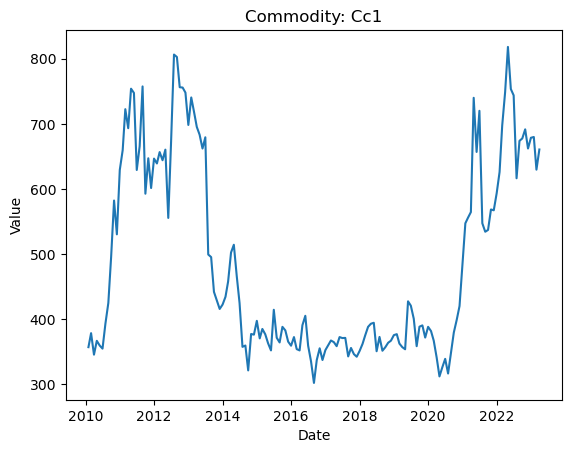

In [82]:
# Iterate over the columns
for column in commodities.columns[1:]:
    # Create a new plot for each currency
    plt.figure()
    
    # Plot the commodity data
    plt.plot(commodities['Date'], commodities[column])
    
    # Customize the plot
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Commodity: {column}')
    
    # Display the plot
    plt.show()

## OLS

In [84]:
#Drop the column Date for the Model evaluations
commodities_dropped = commodities.drop('Date', axis=1)
commodities_dropped.head()

,Cc1
0,356.50
1,378.00
2,345.00
3,366.25
4,359.00


### Backwardselection only with Indicators

-----------------------------------------------
OLS for Cc1 
Selected Indicators: for Time Series Cc1: 
Index(['EUR=', '.SP500', '.SXEP', 'USPPM=ECI', 'EUUNR=ECI', 'USTBAL=ECI',
       'aJPCPICYIY'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    Cc1   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     68.12
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           1.51e-43
Time:                        17:58:07   Log-Likelihood:                -908.07
No. Observations:                 159   AIC:                             1832.
Df Residuals:                     151   BIC:                             1857.
Df Model:                           7                                         
Covariance Type:            nonrobust                              

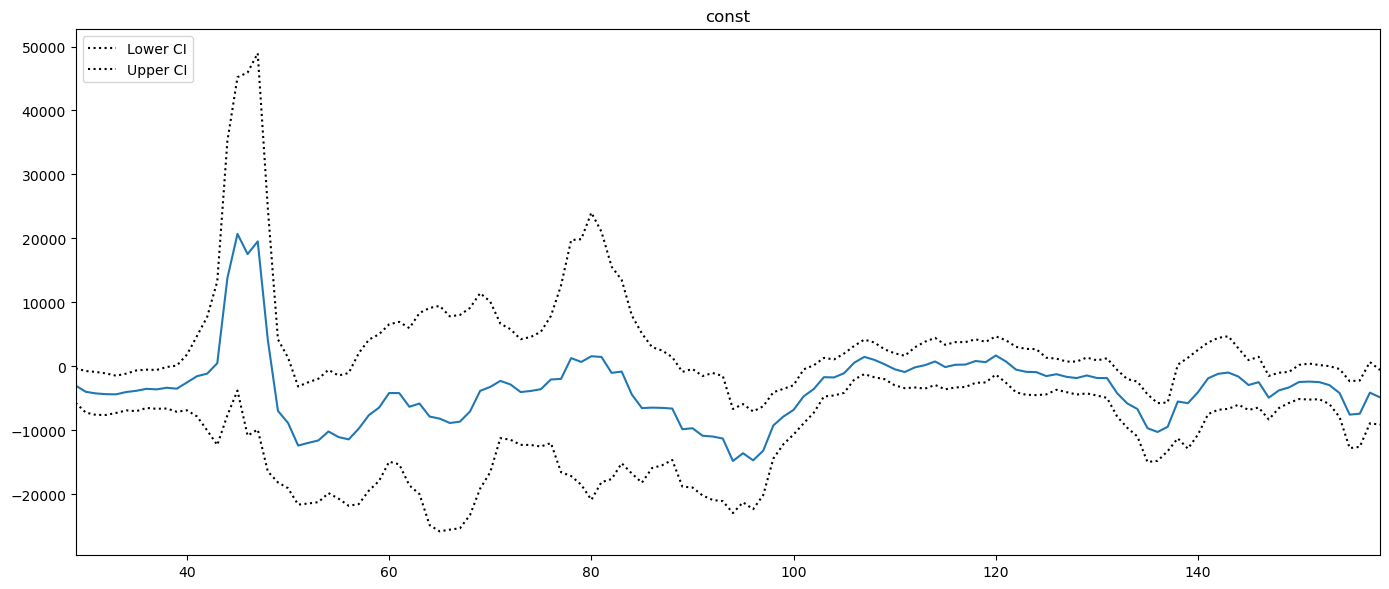

Rolling window Regression for Commodity Cc1 variable EUR= 


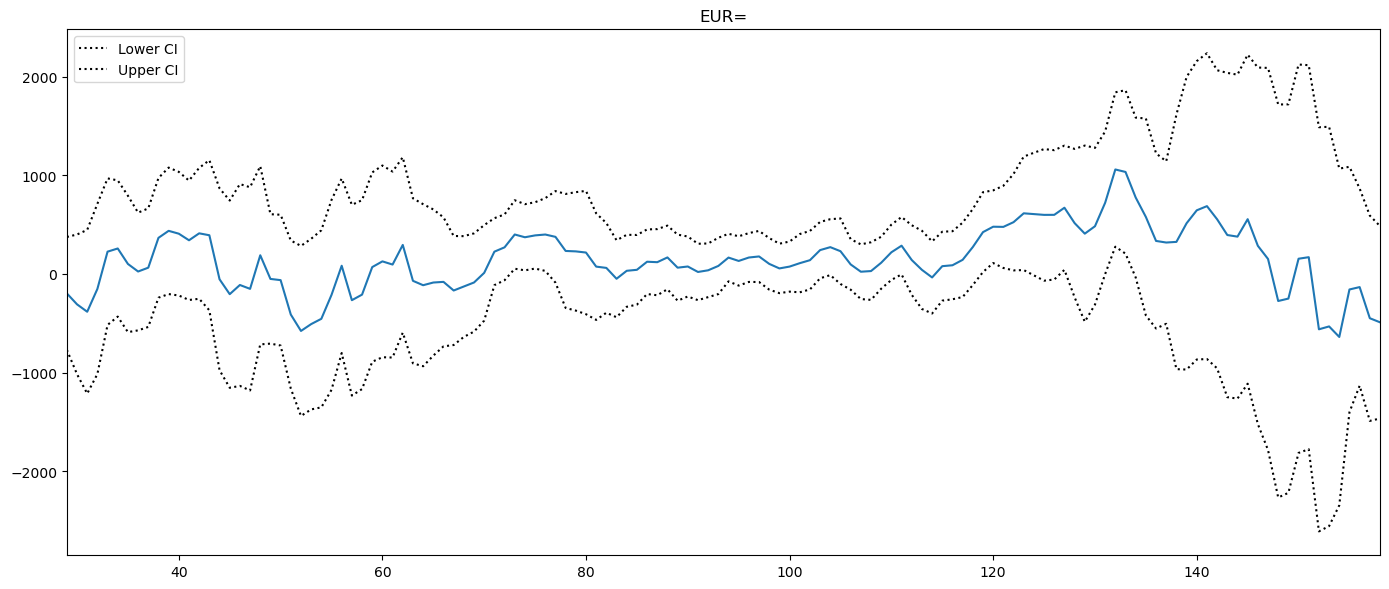

Rolling window Regression for Commodity Cc1 variable .SP500 


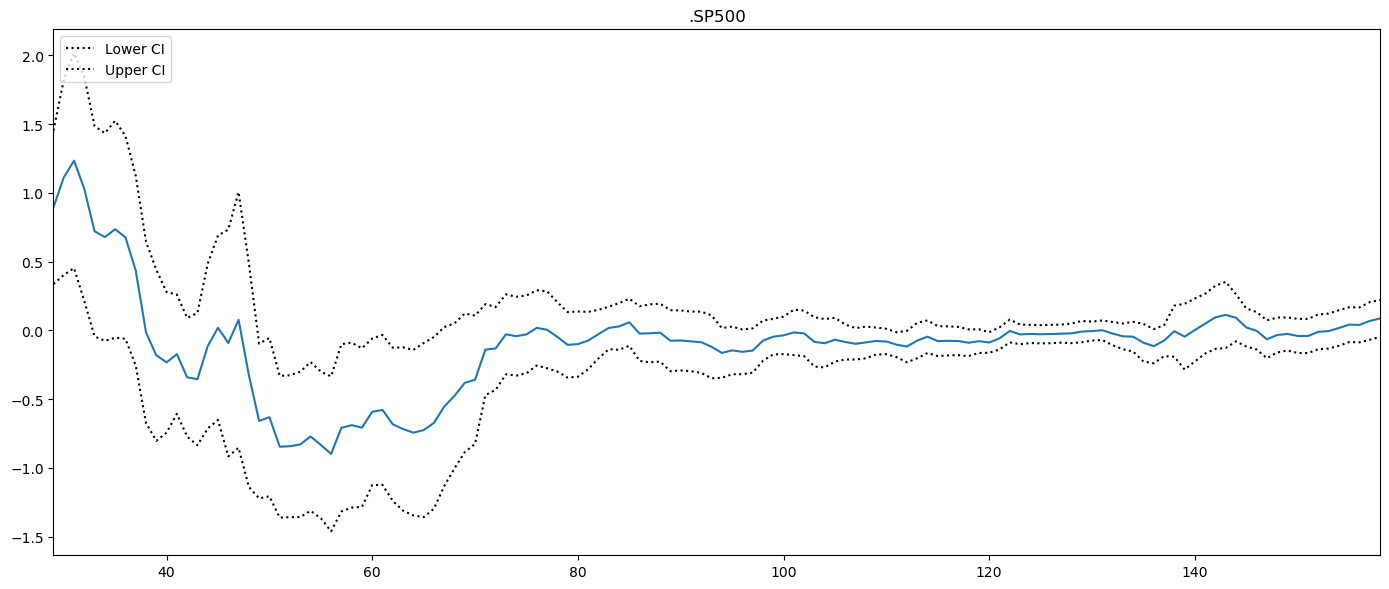

Rolling window Regression for Commodity Cc1 variable .SXEP 


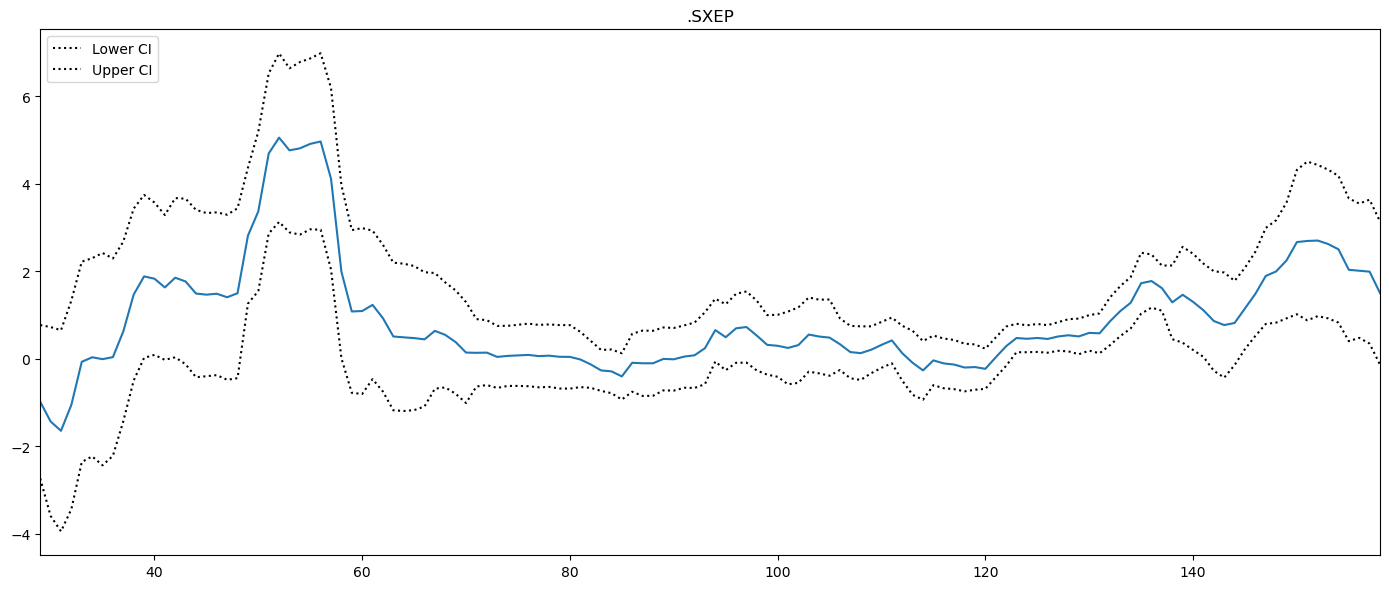

Rolling window Regression for Commodity Cc1 variable USPPM=ECI 


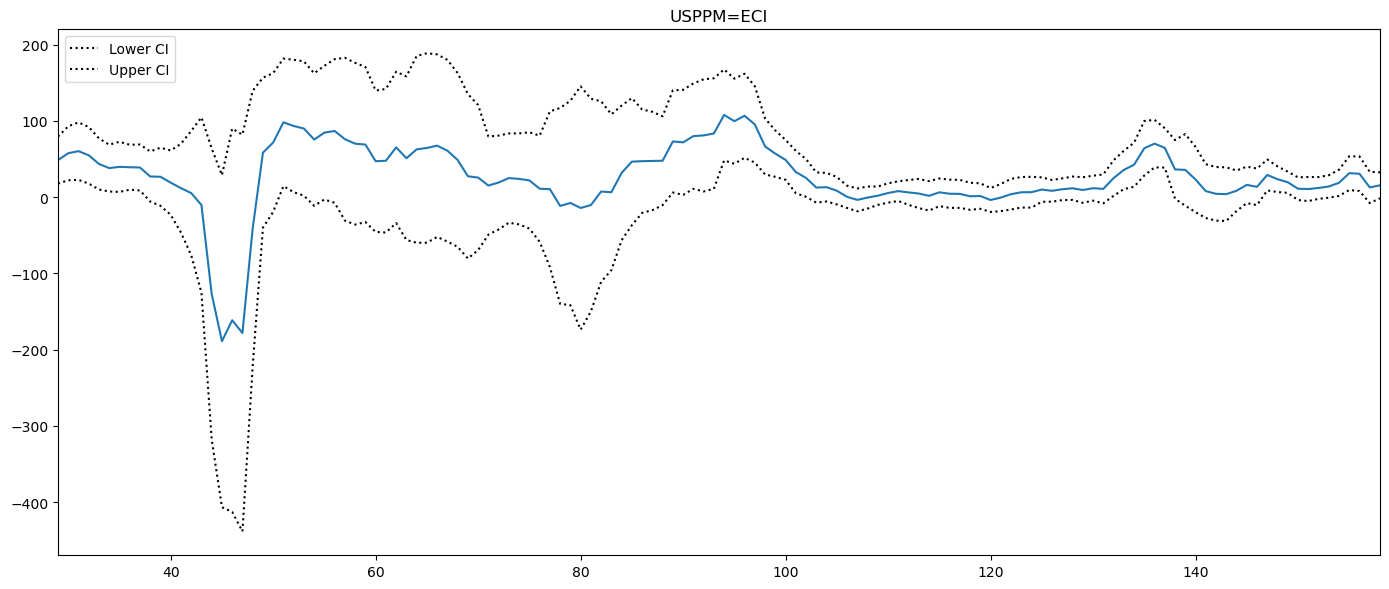

Rolling window Regression for Commodity Cc1 variable EUUNR=ECI 


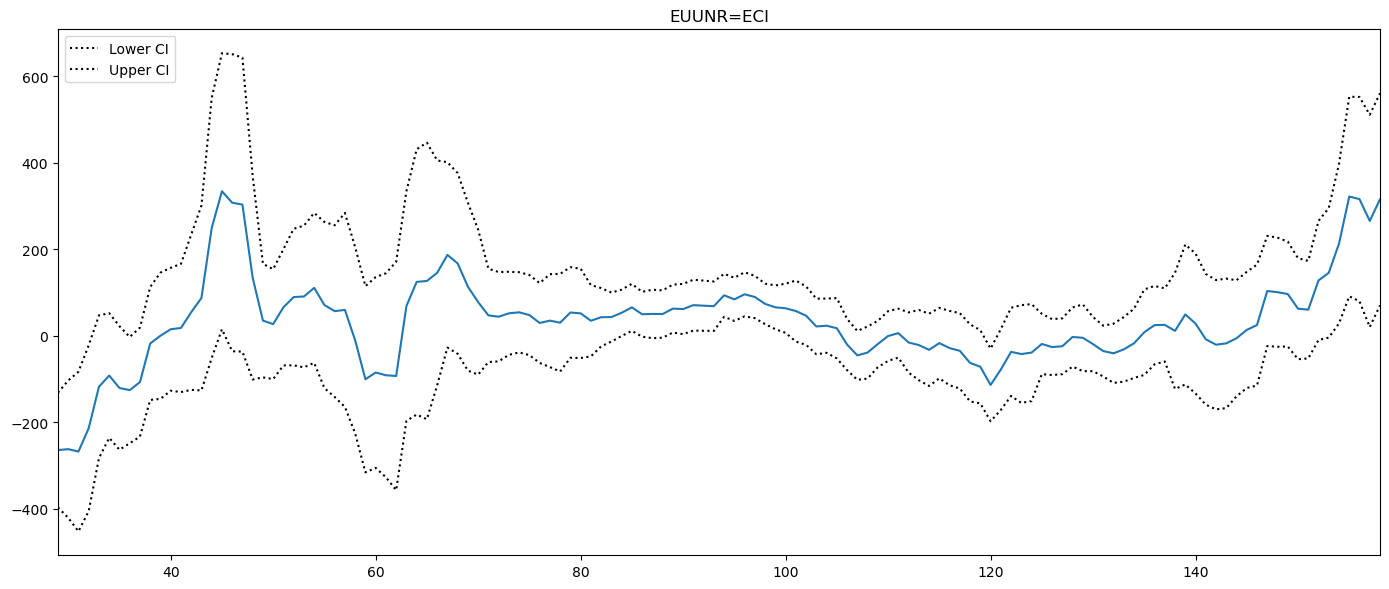

Rolling window Regression for Commodity Cc1 variable USTBAL=ECI 


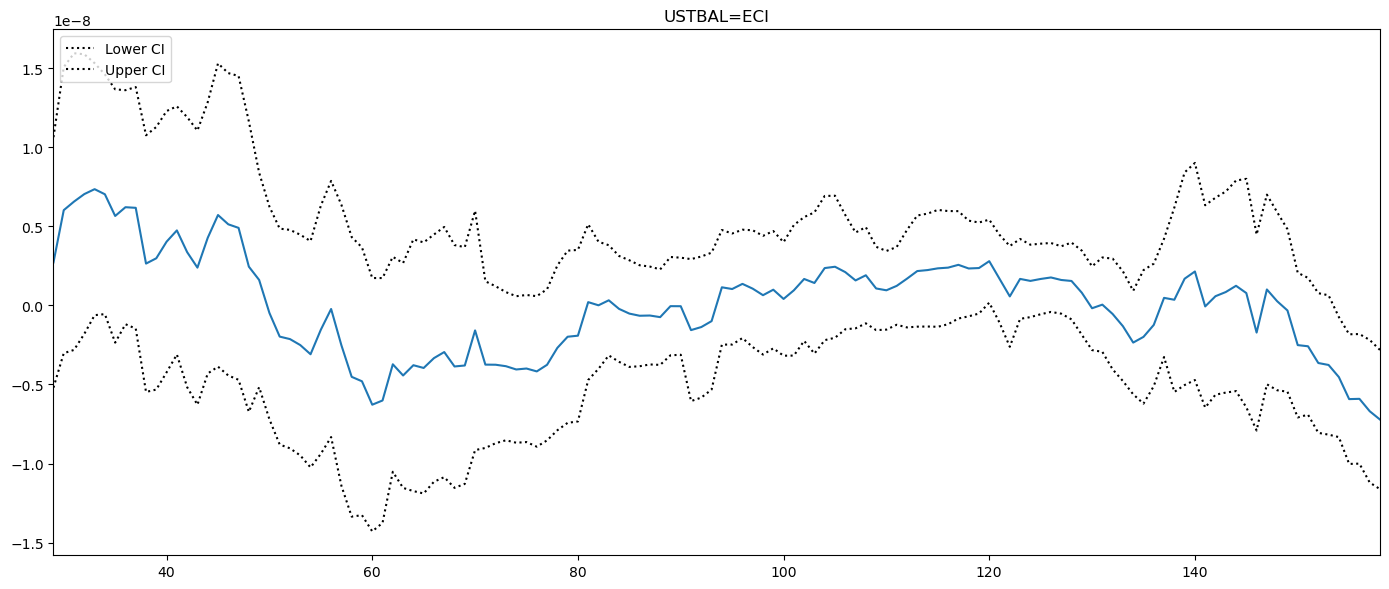

Rolling window Regression for Commodity Cc1 variable aJPCPICYIY 


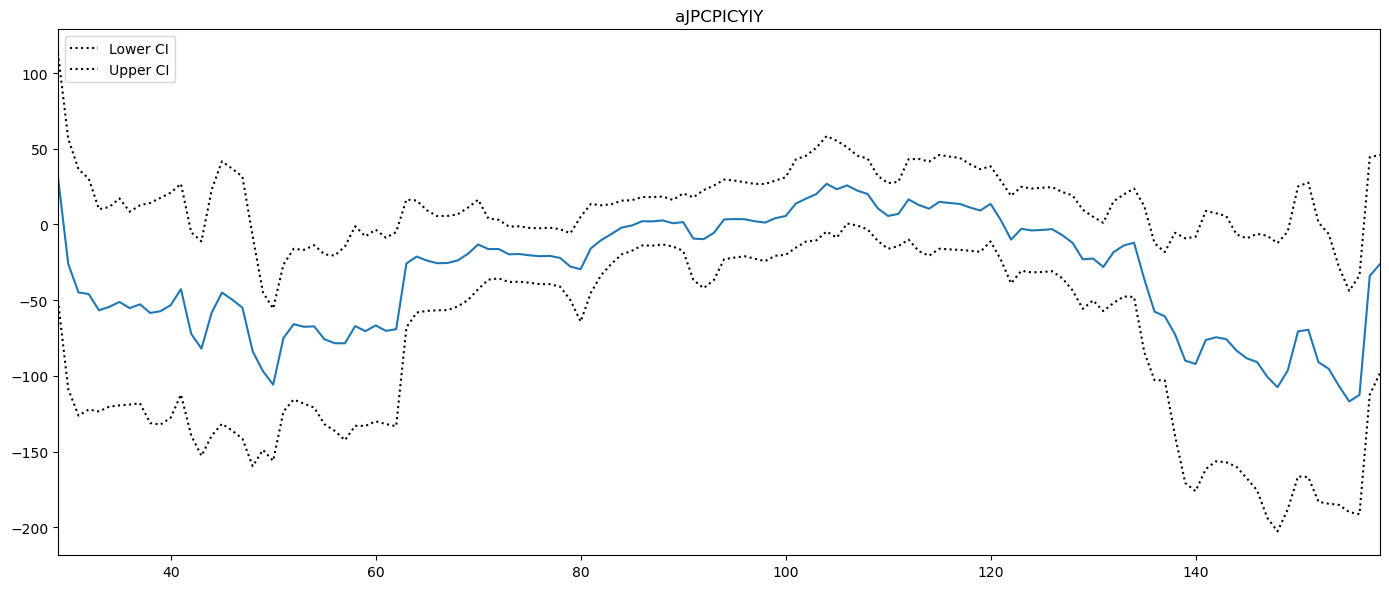

C:\Users\noelw\AppData\Local\Temp\ipykernel_20860\857356269.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table_backward2 = results_table_backward2.append(row, ignore_index=True)


In [89]:
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm
# Create an empty DataFrame to store results
results_table_backward2 = pd.DataFrame(columns=['Time Series', 'R-squared', 'Adjusted R-squared', 'Number of Predictors', 'Chow Test Result', 'Most stable coefficient'])

indicators_without_date = independent_variables
# For Loop for the models with all indicators with a commodity as targets variable
# excluded in the explanatory variable making a Backwardselection
for column in commodities_dropped.columns[0:]:
    print("-----------------------------------------------")
    print(f"\033[1mOLS for {column} \033[0m")
    predictors = indicators_without_date
    num_predictors = len(predictors.columns)

    while num_predictors > 0:
        X = sm.add_constant(predictors)
        Y = commodities_dropped[column]
        model = sm.OLS(commodities_dropped[column], X)
        results = model.fit()

        p_values = results.pvalues.iloc[1:]  # Exclude the constant term
        max_p_value = p_values.max()
        max_p_index = p_values.idxmax()

        if max_p_value > 0.05:
            predictors = predictors.drop(max_p_index, axis=1)
            num_predictors -= 1
        else:
            break
    
    print(f"Selected Indicators: for Time Series {column}: ")
    print(predictors.columns)
    print(results.summary())
    print("-----------------------------------------------")
    
    #Chow Test 
    Y_1 = commodities_dropped[column][0:80]
    X_1 = indicators_without_date[0:80]
    X_1 = sm.add_constant(X_1)

    Y_2 = commodities_dropped[column][80:]
    X_2 = indicators_without_date[80:]
    X_2 = sm.add_constant(X_2)
    
    model = sm.OLS(Y_1,X_1)
    results_1 = model.fit()
    results_1.summary()
    
    model_2 = sm.OLS(Y_2,X_2)
    results_2 = model_2.fit()
    results_2.summary()
    
    J = X.shape[1]
    k = X_1.shape[1]
    N1 = X_1.shape[0]
    N2 = X_2.shape[0]
    
    model_dummy = sm.OLS(Y,X).fit()
    RSSd = model_dummy.ssr

    model_b = sm.OLS(Y_1,X_1).fit()
    RSSb = model_b.ssr

    model_nb = sm.OLS(Y_2,X_2).fit()
    RSSnb = model_nb.ssr
    
    chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
    print("\033[1mChow Test Result: \033[0m")
    result_chow = scipy.stats.f.cdf(chow, J, (N1+N2-2*k))
    print(result_chow)
    print("-----------------------------------------------")

    #Rolling window regressions
    endog = Y.values
    exog = X
    rols = RollingOLS(endog, exog, window=30)
    rres = rols.fit()
    params = rres.params.copy()
    params.index = np.arange(1, params.shape[0] + 1)
    params.tail()
        
    #Identify the most stable coefficient over time 
    res_exp = RollingOLS(endog, exog, window=30, min_nobs=28, expanding=True).fit()
    coefficient_std = res_exp.params.std()
    most_stable_coefficient = coefficient_std.idxmin()
    
    for i in exog: 
        print(f"\033[1mRolling window Regression for Commodity {column} variable {i} \033[0m")
        fig = rres.plot_recursive_coefficient(variables=[i], figsize=(14, 6))
        plt.show()
    
        # Store results in the results_table DataFrame
    row = {
        'Time Series': column,
        'R-squared': results.rsquared,
        'Adjusted R-squared': results.rsquared_adj,
        'Number of Predictors': X.shape[1] - 1, 
        'Chow Test Result': result_chow, 
        'Most stable coefficient': most_stable_coefficient
    }
    results_table_backward2 = results_table_backward2.append(row, ignore_index=True)


## Model Results

In [91]:
# Print the results table
print("\033[1mResults Table for Backwardselection only with Indicators:\033[0m")
results_table_backward2.head()

Results Table for Backwardselection only with Indicators:


,Time Series,R-squared,Adjusted R-squared,Number of Predictors,Chow Test Result,Most stable coefficient
0,Cc1,0.759497,0.748348,7,1.0,USTBAL=ECI
